# The Chinook Store Analysis

I will be assisting the Chinook team with understanding the media in their store, their customers and employees, and their invoice information by answering some questions.

In [1]:
import pandas as pd
import sqlite3 as sql
%matplotlib inline
import matplotlib.pyplot as plt

In the following code we create a run_query() function which takes as an argument a SQL query and returns the pandas dataframe corresponding to this query.

In [2]:
# Create connection to database file
db = sql.connect('chinook.db')
def run_query(query):
    return pd.read_sql_query(query,db)


I will be anserwing the following qurstions using the Chinook store data base
1. Which city has the best customers?We would like to throw a promotional Music Festival in the city we made the most money. Write a 	query that returns the 1 city that has the highest sum of invoice totals. Return both the city name and 	the sum of all invoice totals. 
2. Which countries have the most Invoices?Use the Invoice table to determine the countries that have the most invoices. Provide a table of BillingCountry and Invoices ordered by the number of invoices for each country. The country with the most invoices should appear first.
3. Who is the best customer?The customer who has spent the most money will be declared the best customer. Build a query that returns the person who has spent the most money.
4. We want to find out the most popular music Genre for each country. We determine the most popular genre as the genre with the highest amount of purchases. Write a query that returns each country along with the top Genre. For countries where the maximum number of purchases is shared return all Genres.For this query, you will need to use the Invoice, InvoiceLine, Customer, Track, and Genre tables.
5. Use your query to return the email, first name, last name, and Genre of all Rock Music listeners. Return your list ordered alphabetically by email address starting with A.

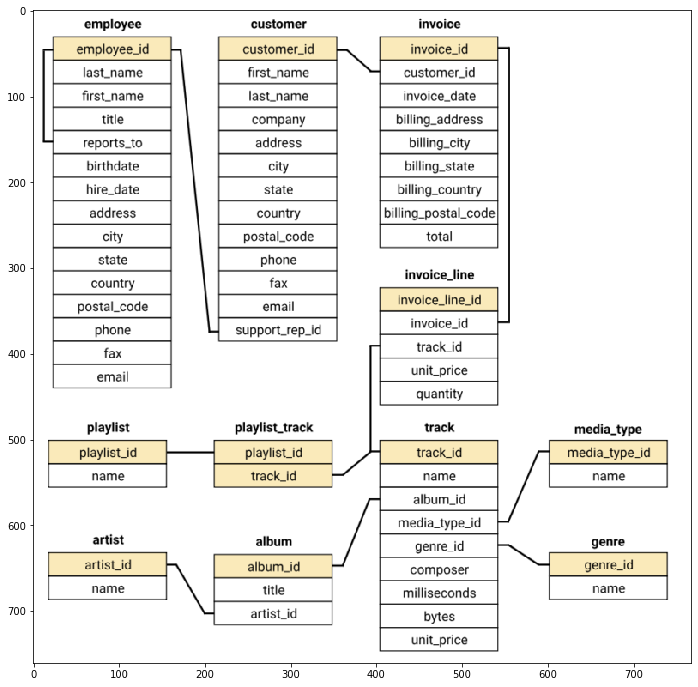

In [3]:
#display the schema of the database 
schema = 'chinook_schema.png'
image = plt.imread(schema)
plt.figure(figsize = (12, 12))
plt.imshow(image)
plt.show()

I now create a show_tables() function which uses our previous run_query() function to return a list of all the tables and views in our database.

In [4]:
def show_tables():
    view_query = 'SELECT name, type FROM sqlite_master WHERE type IN ("table","view");'
    return run_query(view_query)

Running this show_tables() function, we note that we have 11 tables including information on artists, albums, playlists, tracks and genre and business information such as customer, employee and invoices.

In [5]:
show_tables()

,name,type
0,Album,table
1,Artist,table
2,Customer,table
3,Employee,table
4,Genre,table
5,Invoice,table
6,InvoiceLine,table
7,MediaType,table
8,Playlist,table
9,PlaylistTrack,table


**Question One**:Which city has the best customers?We would like to throw a promotional Music Festival in the city we made the most money. Write a query that returns the 1 city that has the highest sum of invoice totals. Return both the city name and the sum of all invoice totals

In [6]:
q = """
    SELECT BillingCity,TOTAL(Total) as Total FROM Invoice GROUP BY 1 ORDER BY 2 DESC LIMIT 1;
"""
run_query(q)

,BillingCity,Total
0,Prague,90.24


From above table, Pregue has the best customers in that it is the city with the highest sales. so the company's Music Festival can be held there. 

__Question Two__:Which countries have the most Invoices?Use the Invoice table to determine the countries that have the most invoices. Provide a table of BillingCountry and Invoices ordered by the number of invoices for each country. The country with the most invoices should appear first.

In [7]:
q = """
    SELECT BillingCountry,Count(*) as count FROM Invoice GROUP BY 1 ORDER BY 2 DESC;
"""
run_query(q)

,BillingCountry,count
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7


From the above table, we can observe that, on its own, the US has the most invoices, followed by Canada,Brazil and France.

__Question three__:Who is the best customer?The customer who has spent the most money will be declared the best customer. Build a query that returns the person who has spent the most money.

In [8]:
q = """
    SELECT c.FirstName || " "|| c.LastName as Name, TOTAL(i.Total) as Total 
    FROM Customer c
    INNER JOIN Invoice i ON  c.CustomerID = i.CustomerID 
    GROUP BY  i.CustomerID 
    ORDER BY 2 DESC
    LIMIT 5;
"""
run_query(q)

,Name,Total
0,Helena Holý,49.62
1,Richard Cunningham,47.62
2,Luis Rojas,46.62
3,Ladislav Kovács,45.62
4,Hugh O'Reilly,45.62


Helena Holy is the customer who has spent the most money. And so, she is the Best customer

**Question four**:We want to find out the most popular music Genre for each country. We determine the most popular genre as the genre with the highest amount of purchases. Write a query that returns each country along with the top Genre. For countries where the maximum number of purchases is shared return all Genres.For this query, you will need to use the Invoice, InvoiceLine, Customer, Track, and Genre tables.

In [33]:
q = """
SELECT c.Country,ig.Genre,ig.Total
    FROM Customer c
    INNER JOIN (
        SELECT i.CustomerId, i.InvoiceId,TOTAL(i.Total) Total, gi.Genre FROM Invoice i
        INNER JOIN (
                SELECT g.Name Genre, il.InvoiceId FROM InvoiceLine il
                INNER JOIN Track t ON t.TrackId = il.TrackId
                INNER JOIN Genre g ON g.GenreId = t.GenreId
        ) gi ON gi.InvoiceId = i.InvoiceId
        GROUP BY 4) ig ON ig.CustomerId = c.CustomerId
    GROUP BY 1
    HAVING MAX(Total)
    ORDER BY 3 DESC
"""
run_query(q)

,Country,Genre,Total
0,Germany,Rock,7720.02
1,USA,Latin,3472.55
2,Canada,Metal,2093.13
3,Sweden,TV Shows,817.71
4,Chile,Drama,544.61
5,India,R&B/Soul,338.62
6,United Kingdom,Reggae,332.64
7,Brazil,Hip Hop/Rap,166.41
8,Czech Republic,Electronica/Dance,149.62
9,Hungary,Comedy,112.30


Amongst all the Genres Rock has the highest in Germany.

__Question five__:Use your query to return the email, first name, last name, and Genre of all Rock Music listeners. Return your list ordered alphabetically by email address starting with A.

In [36]:
q= """
SELECT Email, FirstName, LastName, Genre FROM Customer c
INNER JOIN 
    (SELECT i.CustomerId, i.InvoiceId,gi.Genre FROM Invoice i
        INNER JOIN (
                SELECT g.Name Genre, il.InvoiceId FROM InvoiceLine il
                INNER JOIN Track t ON t.TrackId = il.TrackId
                INNER JOIN Genre g ON g.GenreId = t.GenreId
        ) gi ON gi.InvoiceId = i.InvoiceId
        WHERE Genre == "Rock") a ON a.CustomerId = c.CustomerId
GROUP BY c.CustomerId
ORDER BY 1
"""
run_query(q)

,Email,FirstName,LastName,Genre
0,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1,alero@uol.com.br,Alexandre,Rocha,Rock
2,astrid.gruber@apple.at,Astrid,Gruber,Rock
3,bjorn.hansen@yahoo.no,Bjørn,Hansen,Rock
4,camille.bernard@yahoo.fr,Camille,Bernard,Rock
5,daan_peeters@apple.be,Daan,Peeters,Rock
6,diego.gutierrez@yahoo.ar,Diego,Gutiérrez,Rock
7,dmiller@comcast.com,Dan,Miller,Rock
8,dominiquelefebvre@gmail.com,Dominique,Lefebvre,Rock
9,edfrancis@yachoo.ca,Edward,Francis,Rock
